In [9]:
import pandas as pd
import seaborn as sns

sns.set(style='darkgrid', font='Microsoft JhengHei')

In [10]:
data = pd.read_csv("./data.csv", encoding="mbcs", skiprows=1)
data = data[data.columns.drop(list(data.filter(regex='人口數')))] #篩掉人口數
data = data[data.columns.drop(list(data.filter(regex='出生數')))] #篩掉出生數
top_corr = data.corr()["粗出生率"].drop([
    "婚生人數", "扶幼比", "戶數", '戶量', '山地原住民戶數', '原住民戶數', '戶長男性人數',
    "自然增加人數","自然增加率", '結婚對數', '總增加人數', 
    '非婚生未認領人數', '非婚生已認領人數',
]).abs().sort_values(ascending=False)
# Use absolute value and sort to know what the most related factors are for the birth rate. 
print(top_corr)
selected = [top_corr.index[i] for i in range(25)]
selected

粗出生率                   1.000000
扶老比                    0.468057
老化指數                   0.460069
戶長平均年齡                 0.417963
粗結婚率                   0.319519
粗死亡率                   0.305219
綜合所得稅所得總額申報納稅單位        0.253346
綜合所得稅各類所得納稅單位          0.253346
離婚對數                   0.241286
各類所得金額機會中獎所得           0.239782
各類所得金額薪資所得             0.239013
綜合所得第一分位數              0.236578
共同生活戶數                 0.234054
扶養比                    0.233391
綜合所得總額                 0.225949
薪資淨所得                  0.224043
總戶數                    0.215078
各類所得金額合計               0.214462
結婚登記中外(含大陸港澳配偶)聯姻人數    0.213913
按薪資淨所得計算之綜合所得          0.211403
原住民人口比率                0.200621
綜合所得中位數                0.198712
戶長女性人數                 0.196796
性比例                    0.195893
單獨生活戶數                 0.162033
各類所得金額利息所得             0.147548
綜合所得第三分位數              0.145004
各類所得金額財產交易所得           0.141265
各類所得金額執行業務所得           0.141120
死亡數                    0.132276
各類所得金額申報大於歸戶           0.130815
綜合所得平均數 

['粗出生率',
 '扶老比',
 '老化指數',
 '戶長平均年齡',
 '粗結婚率',
 '粗死亡率',
 '綜合所得稅所得總額申報納稅單位',
 '綜合所得稅各類所得納稅單位',
 '離婚對數',
 '各類所得金額機會中獎所得',
 '各類所得金額薪資所得',
 '綜合所得第一分位數',
 '共同生活戶數',
 '扶養比',
 '綜合所得總額',
 '薪資淨所得',
 '總戶數',
 '各類所得金額合計',
 '結婚登記中外(含大陸港澳配偶)聯姻人數',
 '按薪資淨所得計算之綜合所得',
 '原住民人口比率',
 '綜合所得中位數',
 '戶長女性人數',
 '性比例',
 '單獨生活戶數']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


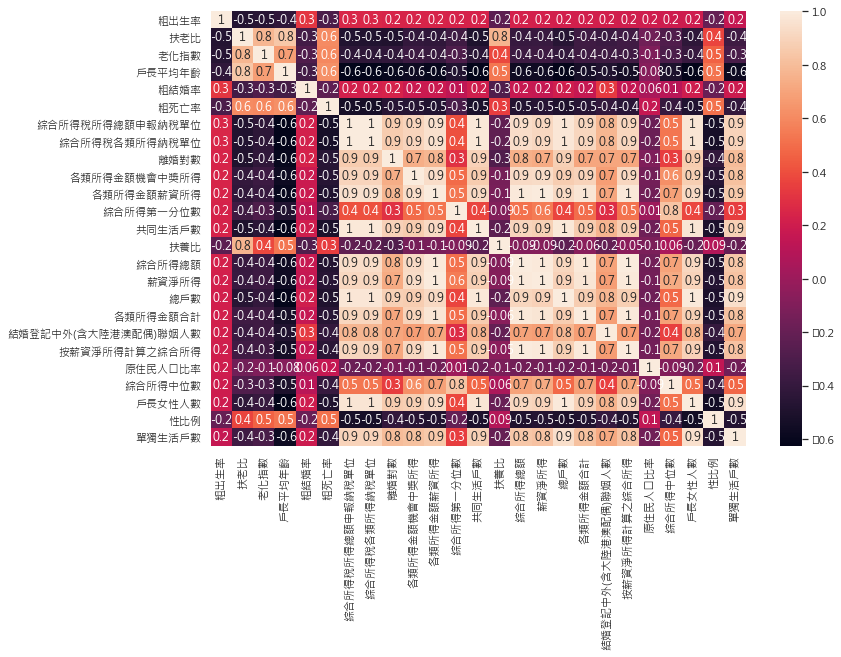

In [11]:
sns_heatmap = sns.heatmap(data[selected].corr(), annot = True, fmt='.1g')
fig = sns_heatmap.get_figure()
fig.savefig("strong_rel_born_and_income.png")
# According to this heatmap, I can know that birth rate is strongly related to aging index, old age dependecy ratio, death rate, income, etc.

![alt text](strong_rel_born_and_number_of_people.png "Title")

Previously, I drew this figure to show that birth date is absolutely related to the poplulation.
Hence, for furtuer discussion, I have to remove those factor about poplulation, or else we will not clearly see the actual results like birth rate is strongly related to the income.
